# **Questões sobre feature extraction/matching**

### Time: **Testemunhas de Aldo**

**Gabriel van der Schmidt** - 202105844

**Lucas Brandão Rodrigues** - 202105854

**Lucca Emmanuel Pineli Simões** - 202105855

Júlio...

## **Questão 1:** *(Fácil)*

Qual é a vantagem de realizar análise/detecção de características em múltiplas escalas?

#### Resposta:



Gerar detectores robustos, pois um detetor pode detectar características em uma escala mas não em outra. Como geralmente não sabemos de antemão qual a granularidade necessária para corretamente detectar os objetos de interesse nas cenas analizadas, a análise multiescala é uma  alternativa para mitigar esse problema.

## **Questão 2:** *(Médio)*

Quais são as invariâncias geométricas e fotométricas que um método de block matching deve apresentar para ser considerado robusto? Como essas invariâncias podem ser alcançadas?

#### Resposta:

Um método de block matching robusto deve apresentar invariâncias geométricas, que lidam com variações de escala, rotação e transformações afins dos objetos na imagem, e invariâncias fotométricas, que lidam com mudanças de iluminação e variações de contraste nos objetos. Para alcançar essas invariâncias, técnicas como normalização de contraste, compensação de iluminação e normalização de escala podem ser utilizadas, além do uso de pirâmides de imagens em diferentes escalas e a aplicação de janelas de busca adaptativas que também auxiliam na abordagem das invariâncias geométricas e fotométricas.

## **Questão 3:** *(Difícil)*

Quais são as principais características locais invariantes utilizadas nos métodos SIFT (Scale-Invariant Feature Transform) e MSER (Maximally Stable Extremal Regions)? Como essas características garantem a invariância a mudanças de escala, rotação e iluminação?

#### Resposta:

O método SIFT utiliza keypoints identificados em diferentes escalas e localizações na imagem. Esses keypoints são encontrados por meio da detecção de extremos do espaço de escala e são descritos por histogramas de gradientes orientados em regiões locais ao seu redor. Essas características garantem a invariância a mudanças de escala, rotação e iluminação.

No método MSER, são detectadas regiões extremas na imagem que se mantêm estáveis sob variações de escala, rotação e iluminação. Essas regiões são identificadas como áreas de contraste consistente em diferentes níveis de intensidade. Essas características locais invariantes proporcionam a invariância necessária para lidar com as variações mencionadas.

## **Questão 4:** *(Prática)*

Construa um programa que encontra e faz o tracking de keypoints em frames de um vídeo. Tome como base o construído nos desafios da última atividade.

#### Resposta:

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# Download video sample
!gdown 1-IyaWRpAuMFr-7JGtLUV3Zoc-Pgse0Pv

Downloading...
From: https://drive.google.com/uc?id=1-IyaWRpAuMFr-7JGtLUV3Zoc-Pgse0Pv
To: /content/videoplayback.avi
100% 1.44M/1.44M [00:00<00:00, 138MB/s]


In [ ]:
def setup_videocap(file_path):
  cap = cv2.VideoCapture(file_path)
  if cap.isOpened() is False:
    print("Cannot open camera")
    return None
  else:
    return cap

def get_matches(gray1, gray2, func):
  kp1, des1 = func.detectAndCompute(gray1, None)
  kp2, des2 = func.detectAndCompute(gray2, None)
  bf = cv2.BFMatcher()
  matches = bf.knnMatch(des1, des2, k=2)

  good = []
  for m,n in matches:
      if m.distance < 0.75*n.distance:
          good.append(m)
  return kp1, kp2, good

def main():
  file = "videoplayback.avi"
  cap = setup_videocap(file)
  if cap is None:
    print("Failed to read file.")
    return None
  _, frame = cap.read()
  gray2 = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  orb = cv2.ORB_create()
  matches = []
  out_images = []

  while cap.isOpened():
    gray1 = gray2
    ret, frame = cap.read()
    if ret is False:
      break
    gray2 = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    kp1, kp2, good = get_matches(gray1, gray2, orb)
    matches.append((kp1, kp2, good))
    img3 = cv2.drawMatches(gray1, kp1, gray2, kp2, good, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    out_images.append(img3)
  return matches, out_images

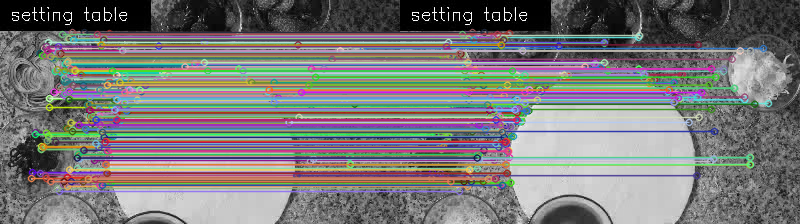

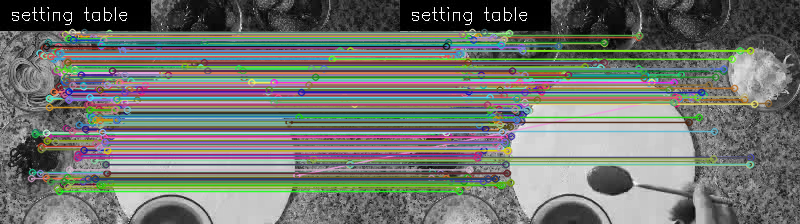

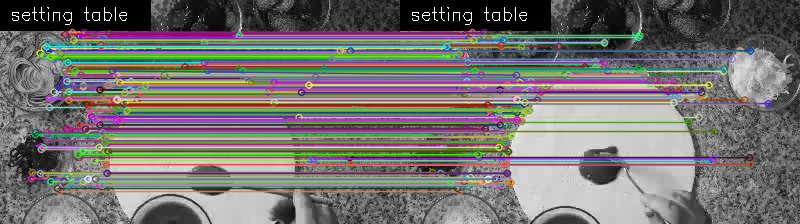

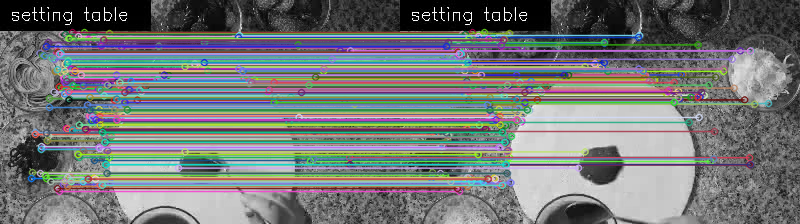

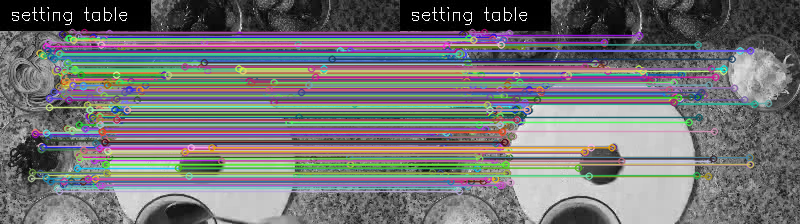

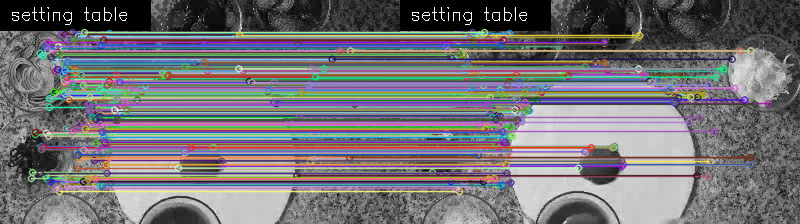

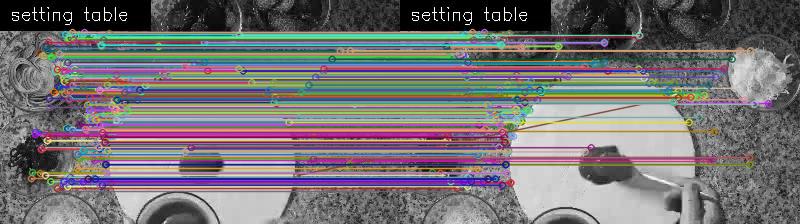

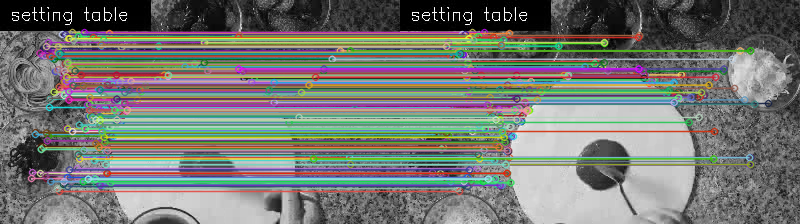

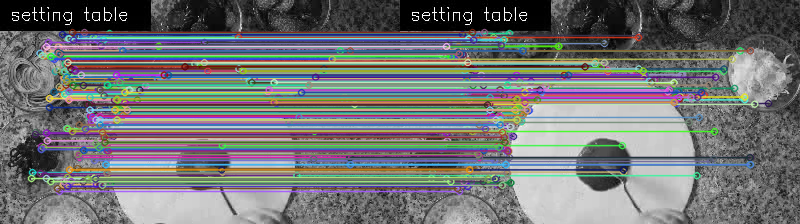

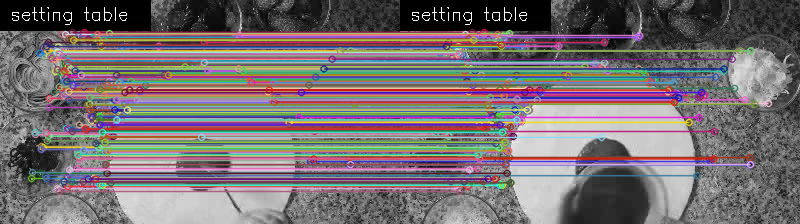

In [ ]:
matches, out_images = main()

for i in range(min([10, len(out_images)])):
  cv2_imshow(out_images[i])